In [1]:
import os
import json


os.listdir("./experiment-results/")

    

['300s_effd2_encoder.ptl_100_wifi_False.json',
 '300s_effd2_encoder.ptl_075_wifi_False.json',
 '300s_effd2_encoder.ptl_025_wifi_False.json',
 '300s_effd2_encoder.ptl_100_wifi_False.png',
 '300s_effd2_encoder.ptl_075_wifi_False.png',
 '300s_effd2_encoder.ptl_025_wifi_True.json',
 '300s_effd2_encoder.ptl_050_wifi_True.json',
 '300s_effd2_encoder.ptl_075_wifi_True.png',
 '300s_effd2_encoder.ptl_075_wifi_True.json',
 '300s_effd2_encoder.ptl_025_wifi_False.png',
 '300s_effd2_encoder.ptl_050_wifi_False.json',
 '300s_effd2_encoder.ptl_100_wifi_True.json',
 '300s_effd2_encoder.ptl_100_wifi_True.png',
 '300s__100_wifi_False.png',
 '300s_effd2_encoder.ptl_050_wifi_False.png',
 '300s__100_wifi_False.json',
 '300s_effd2_encoder.ptl_025_wifi_True.png',
 '300s_effd2_encoder.ptl_050_wifi_True.png']

In [2]:
import os
import json

seconds=300

with open("./experiment-results/{}s__100_wifi_False.json".format(seconds), "r") as f:
    base_experiment = json.load(f) 

experiment_list = []
encoder_name = "effd2_encoder.ptl"
for filename in os.listdir("./experiment-results/"):
    if filename.split(".")[-1] == "json" and encoder_name in filename :
        filename = os.path.join("./experiment-results/", filename)
        print(filename)
        with open(filename, "r") as f:
            experiment_list.append(json.load(f))
print(base_experiment)



base_energy = base_experiment['joules1']

for e in experiment_list:
    e['joules1'] -= base_energy
    e['joules1_per_image'] = e['joules1']/e['num_images']

experiment_list = sorted(experiment_list, key = lambda i: i['alpha'])
    

./experiment-results/300s_effd2_encoder.ptl_100_wifi_False.json
./experiment-results/300s_effd2_encoder.ptl_075_wifi_False.json
./experiment-results/300s_effd2_encoder.ptl_025_wifi_False.json
./experiment-results/300s_effd2_encoder.ptl_025_wifi_True.json
./experiment-results/300s_effd2_encoder.ptl_050_wifi_True.json
./experiment-results/300s_effd2_encoder.ptl_075_wifi_True.json
./experiment-results/300s_effd2_encoder.ptl_050_wifi_False.json
./experiment-results/300s_effd2_encoder.ptl_100_wifi_True.json
{'model': '', 'alpha': 1.0, 'seconds': 300, 'url': '', 'joules1': 883.5798201020002, 'joules1_per_image': 2.054836790934884, 'joules2': 882.0, 'joules2_per_image': 2.0511627906976746, 'num_images': 430, 'compute_latency': 0.6976744186046512}


In [3]:
dnn_only_experiments = [e for e in experiment_list if not e['url']]
dnn_wifi_experiments = [e for e in experiment_list if len(e['url'])>0]

for e in dnn_only_experiments:
    print(e['alpha'], e['joules1'], e['joules1_per_image'], e['url'], e['num_images'])
    
print()
for e in dnn_wifi_experiments:
    print(e['alpha'], e['joules1'], e['joules1_per_image'], e['url'], e['num_images'])

print()

compute = []
transmit = []
compute_latency = []
for i in range(len(dnn_only_experiments)):
    e = dnn_only_experiments[i]
    e['joules_per_transmission'] = dnn_wifi_experiments[i]['joules1_per_image'] - e['joules1_per_image']
    print(e['alpha'], e['joules1_per_image'], e['joules_per_transmission'], e['url'], e['num_images'])
    
    compute.append(e['joules1_per_image'])
    transmit.append(e['joules_per_transmission'])
    compute_latency.append(e['compute_latency'])
    
    

0.25 52.25230442399925 0.3003006001379267  174
0.5 43.04767541599938 0.4531334254315724  95
0.75 45.029614330001095 0.7147557830158904  63
1.0 50.63599097599899 0.992862568156843  51

0.25 59.631143708000536 0.40291313316216576 http://192.168.1.102:5000/ 148
0.5 59.183182191000355 0.6802664619655213 http://192.168.1.102:5000/ 87
0.75 64.29845888199941 1.020610458444435 http://192.168.1.102:5000/ 63
1.0 71.92980797600046 1.4679552648163359 http://192.168.1.102:5000/ 49

0.25 0.3003006001379267 0.10261253302423906  174
0.5 0.4531334254315724 0.2271330365339489  95
0.75 0.7147557830158904 0.3058546754285447  63
1.0 0.992862568156843 0.47509269665949283  51


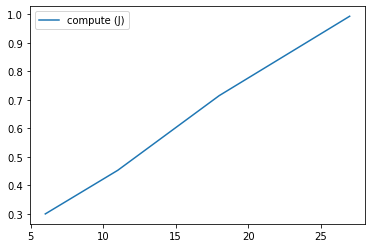

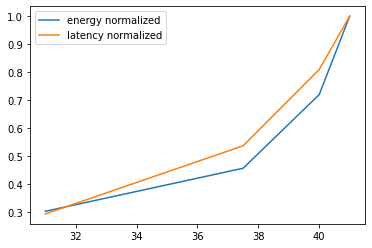

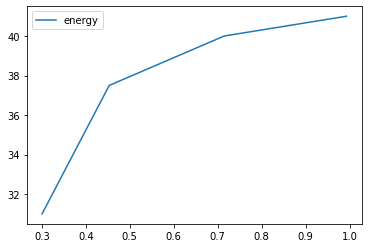

In [17]:
specs = {
    0.25: [6, 110],
    0.5: [11, 220],
    0.75: [18, 330],
    1.0: [27, 440]
}
alpha = [0.25, 0.5, 0.75, 1.0]
bw = [110, 220, 330, 440]
mac = [6, 11, 18, 27]
acc = [31, 37.5, 40, 41]


import matplotlib.pyplot as plt
import numpy as np

# plt.plot(mac, compute)
# plt.plot(compute_latency, np.array(compute))
# plt.show()
plt.plot(mac, np.array(compute), label="compute (J)")
plt.legend()
plt.show()
plt.plot(acc, np.array(compute)/np.max(compute), label="energy normalized")
plt.plot(acc, np.array(compute_latency)/np.max(compute_latency), label="latency normalized")
plt.legend()
plt.show()

plt.plot(np.array(compute), acc, label="energy")
plt.legend()